# Correlation of Correlations (Fig 18 Data)

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from analysis.correlation_of_correlations import *
from common.helpers import get_graphemes, get_phonemes

sns.set_style('darkgrid')

## Load Activation Data

In [3]:
all_data = []
for dilution in range(1, 4):
    # Load anchors data
    hidden_data = pd.read_pickle(f'../pmsp-recurrent-dt-100-dilution-{dilution}-seed-1/activations-fig18-hidden.pkl')
    output_data = pd.read_pickle(f'../pmsp-recurrent-dt-100-dilution-{dilution}-seed-1/activations-fig18-output.pkl')
    hidden_data['epoch'] = hidden_data['epoch'].astype(int)
    output_data['epoch'] = output_data['epoch'].astype(int)
    activation_data = pd.merge(hidden_data, output_data, how='left', on=['epoch', 'word']).reset_index(drop=True)
    activation_data['dilution'] = dilution
    all_data.append(activation_data)
all_data = pd.concat(all_data)

In [4]:
orth_phon_mapping = pd.read_csv(f'../../../dataset/plaut_fig18_orth_phon_mapping.csv')
all_data = all_data.merge(orth_phon_mapping, left_on='word', right_on='orth')

In [5]:
# find input representations
inputs = []
for orth in all_data['orth'].unique():
    inputs.append({'orth': orth, 'input': get_graphemes(orth)})
inputs = pd.DataFrame(inputs)
all_data = all_data.merge(inputs, on='orth')

In [6]:
# find target representations
targets = []
for phon in all_data['phon'].unique():
    targets.append({'phon': phon, 'target': get_phonemes(phon)})
targets = pd.DataFrame(targets)
all_data = all_data.merge(targets, on='phon')

In [7]:
all_data

,epoch,word,hidden,output,dilution,orth,phon,type,input,target
0,2000,want,"[0.9992484, 7.578326e-05, 0.5444078, 0.0060757...","[0.0024928, 5.417722e-06, 2.454546e-07, 1.1253...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2050,want,"[0.9973117, 6.775759e-05, 0.8369805, 0.0018435...","[0.01266756, 1.563354e-05, 4.183984e-07, 1.125...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2100,want,"[0.9981328, 3.745106e-05, 0.9183796, 0.0006878...","[0.01723519, 3.662822e-05, 8.696365e-07, 1.125...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2150,want,"[0.9985882, 1.508003e-05, 0.9344223, 0.0006308...","[0.008354531, 3.157019e-06, 2.789684e-06, 1.12...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2200,want,"[0.9985343, 1.289926e-05, 0.9581923, 0.0004255...","[0.005783692, 2.255389e-06, 1.222824e-05, 1.12...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
16411,3650,word,"[0.9999824, 0.2372614, 5.590504e-06, 1.125352e...","[4.362957e-07, 1.859636e-07, 1.125352e-07, 1.1...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16412,3700,word,"[0.9999831, 0.2438719, 5.632958e-06, 1.125352e...","[3.820661e-07, 1.767839e-07, 1.125352e-07, 1.1...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16413,3750,word,"[0.9999831, 0.2457399, 5.700836e-06, 1.125352e...","[3.738033e-07, 1.78936e-07, 1.125352e-07, 1.12...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16414,3800,word,"[0.9999831, 0.2542094, 5.872238e-06, 1.125352e...","[3.453583e-07, 1.761522e-07, 1.125352e-07, 6.8...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Calculate Correlation Vectors

In [8]:
regulars = all_data[all_data['type'] == 'Regular Inconsistent']
exceptions = all_data[all_data['type'] == 'Exception']
nonwords = all_data[all_data['type'] == 'Nonword']

regulars = calculate_correlation_vectors(regulars)
exceptions = calculate_correlation_vectors(exceptions)
nonwords = calculate_correlation_vectors(nonwords)

100%|██████████| 38/38 [00:06<00:00,  5.56it/s]


In [9]:
regulars.head()

,epoch,word,hidden,output,dilution,orth,phon,type,input,target,input_corr_vector,hidden_corr_vector,output_corr_vector,target_corr_vector
0,2000,cook,"[0.6684868, 0.09308521, 0.006495159, 0.0011955...","[0.01362225, 1.301807e-07, 9.591738e-05, 1.125...",1,cook,/kuk/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1.0, -0.0444994159489985, -0.0396039603960396...","[1.0, 0.33835272337149624, 0.31517964229048395...","[1.0, 0.026959701249093793, 0.1891772989374288...","[1.0, -0.0679575352774453, -0.0517241379310344..."
1,2000,plant,"[0.9999999, 0.1006116, 0.9478889, 0.05150412, ...","[4.565937e-05, 4.816016e-06, 3.149573e-06, 1.1...",1,plant,/pl@nt/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.0444994159489985, 1.0, -0.0444994159489985...","[0.33835272337149624, 1.0, 0.23294286973016837...","[0.026959701249093793, 1.0, -0.094424236994179...","[-0.0679575352774453, 1.0, -0.0679575352774453..."
2,2000,here,"[0.7940146, 4.240346e-05, 0.0001987195, 0.0240...","[3.047429e-05, 0.00101197, 0.0005329198, 1.193...",1,here,/hEr/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.03960396039603961, -0.044499415948998505, ...","[0.31517964229048395, 0.23294286973016837, 1.0...","[0.1891772989374288, -0.09442423699417923, 1.0...","[-0.05172413793103449, -0.06795753527744532, 1..."
3,2000,base,"[0.8952631, 9.717015e-07, 0.9992864, 0.0060000...","[0.0009736997, 6.299433e-07, 1.464909e-05, 1.1...",1,base,/bAs/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[-0.0396039603960396, 0.18912251778324335, 0.2...","[0.16120116334467435, 0.6016743987427556, 0.39...","[-0.0692393835389362, -0.06443947165403234, -0...","[-0.0517241379310345, -0.06795753527744532, -0..."
4,2000,paid,"[0.3667773, 0.02710126, 0.9527823, 0.000110064...","[0.0004824456, 2.067133e-06, 1.180805e-05, 1.1...",1,paid,/pAd/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.044499415948998464, 0.36999999999999983, -...","[0.24611281432437612, 0.6260627806396979, 0.15...","[-0.0695565664228514, 0.2291200821362446, 0.11...","[-0.0517241379310345, 0.2084031081841655, -0.0..."


## Calculate Correlation of Correlations

In [10]:
regulars = calculate_cross_layer_correlation(regulars)
exceptions = calculate_cross_layer_correlation(exceptions)
nonwords = calculate_cross_layer_correlation(nonwords)

In [11]:
regulars.head()

,epoch,word,hidden,output,dilution,orth,phon,type,input,target,input_corr_vector,hidden_corr_vector,output_corr_vector,target_corr_vector,orth_hidden_corr,hidden_phon_corr,orth_phon_corr,orth_target_corr
0,2000,cook,"[0.6684868, 0.09308521, 0.006495159, 0.0011955...","[0.01362225, 1.301807e-07, 9.591738e-05, 1.125...",1,cook,/kuk/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1.0, -0.0444994159489985, -0.0396039603960396...","[1.0, 0.33835272337149624, 0.31517964229048395...","[1.0, 0.026959701249093793, 0.1891772989374288...","[1.0, -0.0679575352774453, -0.0517241379310344...",0.777728,0.842195,0.520754,0.709965
1,2000,plant,"[0.9999999, 0.1006116, 0.9478889, 0.05150412, ...","[4.565937e-05, 4.816016e-06, 3.149573e-06, 1.1...",1,plant,/pl@nt/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.0444994159489985, 1.0, -0.0444994159489985...","[0.33835272337149624, 1.0, 0.23294286973016837...","[0.026959701249093793, 1.0, -0.094424236994179...","[-0.0679575352774453, 1.0, -0.0679575352774453...",0.874306,0.762613,0.749052,0.896777
2,2000,here,"[0.7940146, 4.240346e-05, 0.0001987195, 0.0240...","[3.047429e-05, 0.00101197, 0.0005329198, 1.193...",1,here,/hEr/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.03960396039603961, -0.044499415948998505, ...","[0.31517964229048395, 0.23294286973016837, 1.0...","[0.1891772989374288, -0.09442423699417923, 1.0...","[-0.05172413793103449, -0.06795753527744532, 1...",0.759612,0.768893,0.788989,0.849359
3,2000,base,"[0.8952631, 9.717015e-07, 0.9992864, 0.0060000...","[0.0009736997, 6.299433e-07, 1.464909e-05, 1.1...",1,base,/bAs/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[-0.0396039603960396, 0.18912251778324335, 0.2...","[0.16120116334467435, 0.6016743987427556, 0.39...","[-0.0692393835389362, -0.06443947165403234, -0...","[-0.0517241379310345, -0.06795753527744532, -0...",0.842500,0.692053,0.660574,0.746205
4,2000,paid,"[0.3667773, 0.02710126, 0.9527823, 0.000110064...","[0.0004824456, 2.067133e-06, 1.180805e-05, 1.1...",1,paid,/pAd/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.044499415948998464, 0.36999999999999983, -...","[0.24611281432437612, 0.6260627806396979, 0.15...","[-0.0695565664228514, 0.2291200821362446, 0.11...","[-0.0517241379310345, 0.2084031081841655, -0.0...",0.904860,0.666306,0.806707,0.825049


In [12]:
accum = []
for df in [regulars, nonwords, exceptions]:
    for col in ['orth_hidden_corr', 'hidden_phon_corr', 'orth_phon_corr', 'orth_target_corr']:
        temp = df[['epoch', 'orth', 'type', 'dilution']]
        temp['corr'] = df[col]
        temp['corr_type'] = col.rstrip('_corr').replace('_', '-').title()
        accum.append(temp)
all_data = pd.concat(accum)

In [13]:
all_data

,epoch,orth,type,dilution,corr,corr_type
0,2000,cook,Regular Inconsistent,1,0.777728,Orth-Hidden
1,2000,plant,Regular Inconsistent,1,0.874306,Orth-Hidden
2,2000,here,Regular Inconsistent,1,0.759612,Orth-Hidden
3,2000,base,Regular Inconsistent,1,0.842500,Orth-Hidden
4,2000,paid,Regular Inconsistent,1,0.904860,Orth-Hidden
...,...,...,...,...,...,...
5467,3850,plow,Exception,3,0.727165,Orth-Target
5468,3850,doll,Exception,3,0.629604,Orth-Target
5469,3850,shall,Exception,3,0.746541,Orth-Target
5470,3850,deaf,Exception,3,0.619822,Orth-Target


## Plot Results

### All Dilution Levels

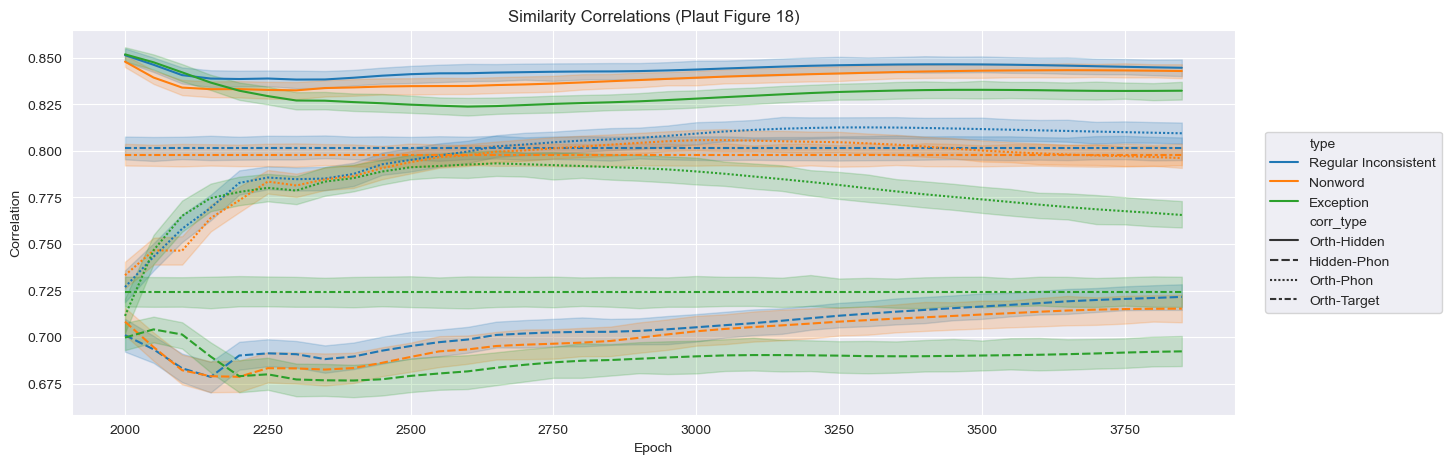

In [14]:
generate_correlation_of_correlations_lineplot(all_data)

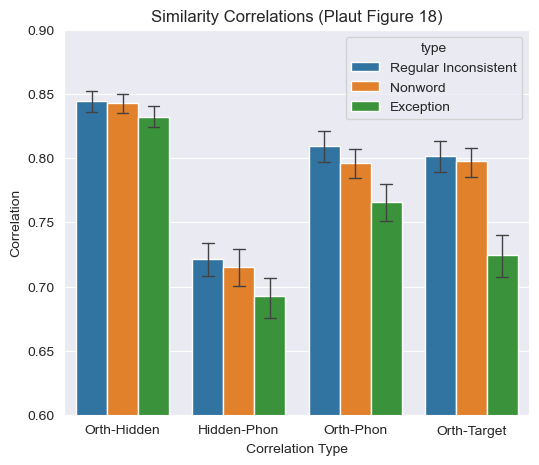

In [15]:
generate_correlation_of_correlations_barplot(all_data, epoch=all_data['epoch'].max())

### Individual Dilution Levels

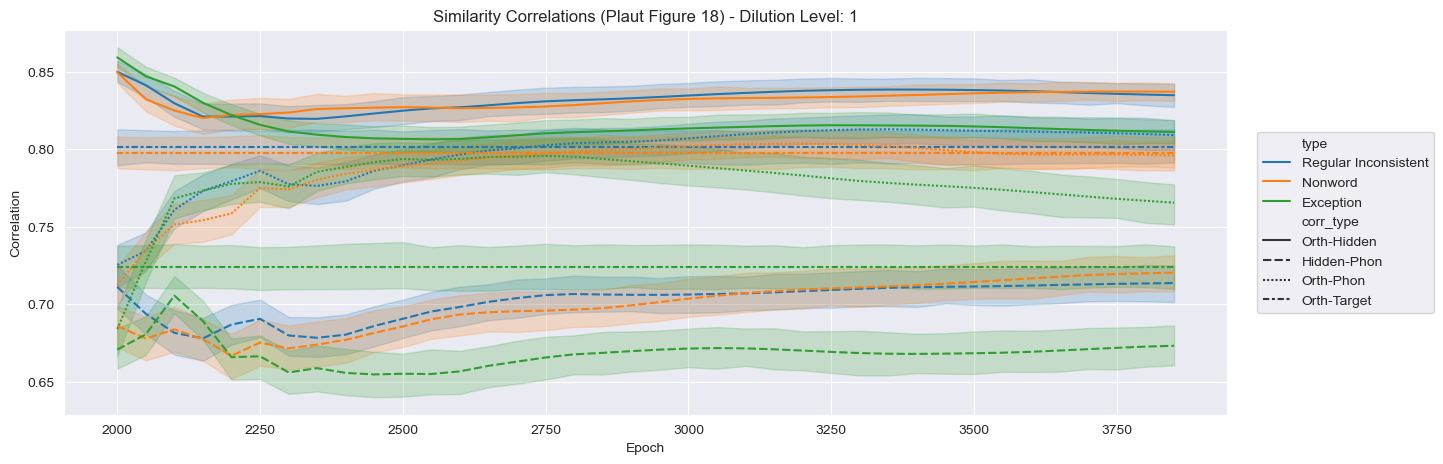

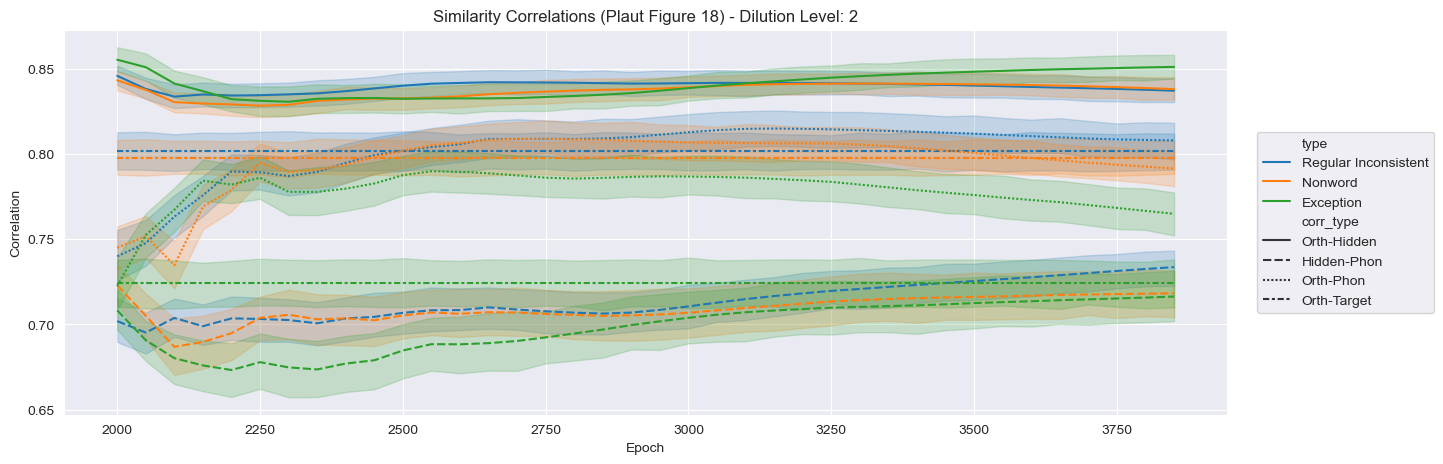

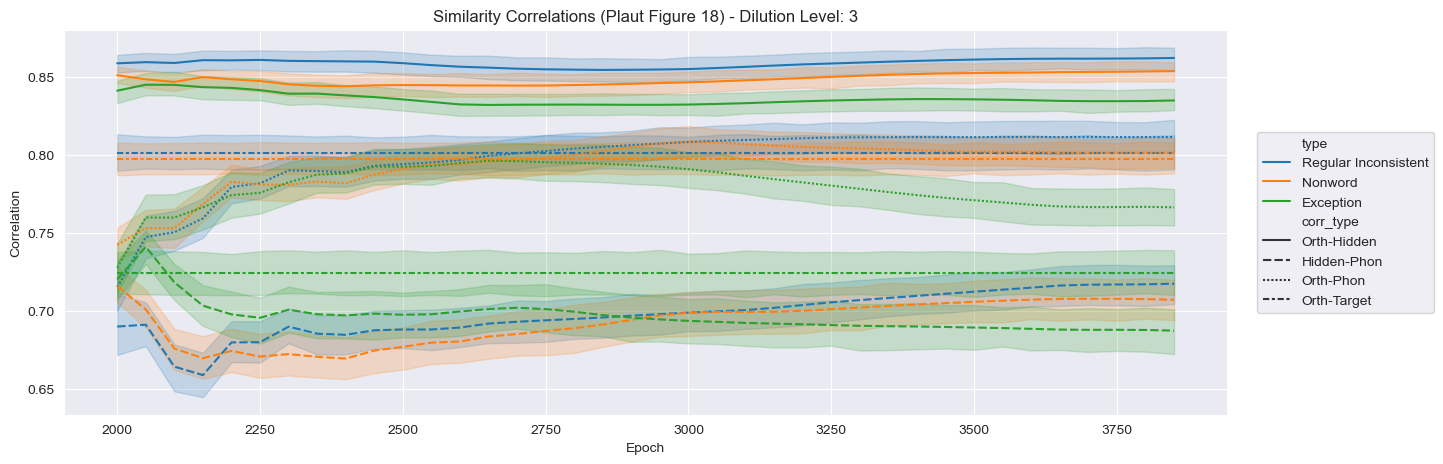

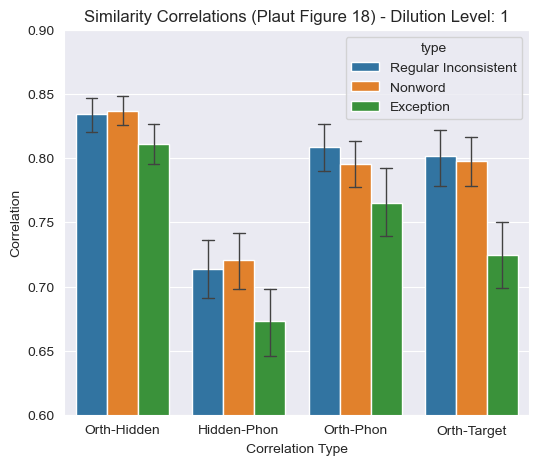

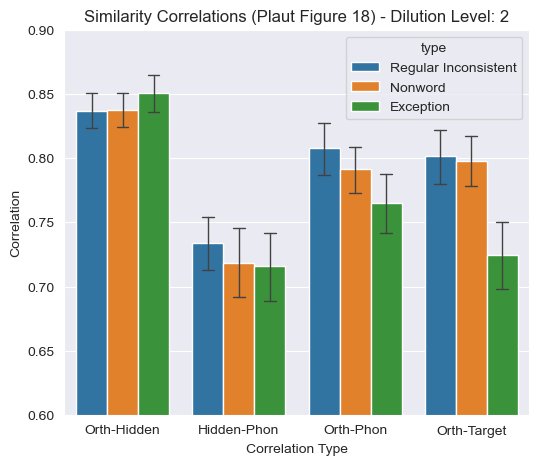

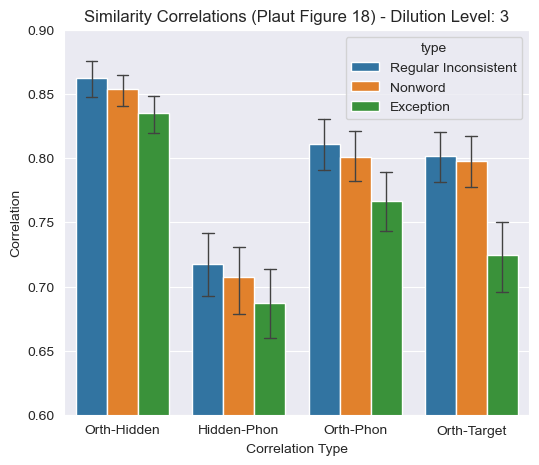

In [16]:
for dilution in range(1, 4):
    generate_correlation_of_correlations_lineplot(all_data, dilution=dilution)
for dilution in range(1, 4):
    generate_correlation_of_correlations_barplot(all_data, epoch=all_data['epoch'].max(), dilution=dilution)